In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install tensorflow==2.15 --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 120.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Success

In [2]:
!pip install protobuf==3.20.* --upgrade --force-reinstall


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.8
    Uninstalling protobuf-4.25.8:
      Successfully uninstalled protobuf-4.25.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
a2a-sdk 0.3.10 requires protobuf>=5.29.5, but you have protobuf 3.20.3 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
bigfram

In [3]:
!pip uninstall -y tensorflow_hub


Found existing installation: tensorflow-hub 0.16.1
Uninstalling tensorflow-hub-0.16.1:
  Successfully uninstalled tensorflow-hub-0.16.1


In [4]:
!pip install tensorflow_hub==0.16


In [5]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))


2025-12-09 13:42:14.098599: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-09 13:42:14.098655: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-09 13:42:14.100018: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


GPU Available: []


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import (confusion_matrix, classification_report, 
                            accuracy_score, precision_score, recall_score, 
                            f1_score, roc_curve, auc, roc_auc_score)
from sklearn.preprocessing import label_binarize
import os


In [7]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [8]:
DATA_DIR = "/kaggle/input/plantdisease/PlantVillage"  # DATASET READY ON KAGGLE
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 20   


In [30]:
class Config:
    DATA_PATH = '/kaggle/input/plantdisease/PlantVillage'
    IMG_SIZE = 224
    IMG_CHANNELS = 3
    VAL_SIZE = 0.15
    
    EPOCHS = 20
    BATCH_SIZE = 16
    LEARNING_RATE = 0.001
    RANDOM_SEED = 42
    
config = Config()
print("Configuration set!")
print(f"  Batch size: {config.BATCH_SIZE}")
print(f"  Epochs: {config.EPOCHS}")
print(f"  Validation split: {config.VAL_SIZE}")

Configuration set!
  Batch size: 16
  Epochs: 20
  Validation split: 0.15


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib

print("\n" + "="*80)
print("LOADING DATA")
print("="*80)

# Get class names
data_dir = pathlib.Path(config.DATA_PATH)
class_names = sorted([item.name for item in data_dir.glob('*') if item.is_dir()])
num_classes = len(class_names)

print(f"Found {num_classes} classes")
print(f"  Classes: {class_names[:5]}... (showing first 5)")

print("\n Creating NORMAL dataset (for MobileNet & Inception)...")
train_datagen_normal = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15
)

train_gen_normal = train_datagen_normal.flow_from_directory(
    config.DATA_PATH,
    target_size=(config.IMG_SIZE, config.IMG_SIZE),
    batch_size=config.BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=config.RANDOM_SEED
)


print("\nCreating validation dataset...")
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15
)

val_gen = val_datagen.flow_from_directory(
    config.DATA_PATH,
    target_size=(config.IMG_SIZE, config.IMG_SIZE),
    batch_size=config.BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=config.RANDOM_SEED
)

+
print(f"\nDatasets Ready!")
#print(f"  Training samples (augmented): {train_gen_aug.samples}")
print(f"  Training samples (normal): {train_gen_normal.samples}")
print(f"  Validation samples: {val_gen.samples}")
print(f"  Batch size: {config.BATCH_SIZE}")
print(f"  Classes: 15")
print("="*80)


LOADING DATA
Found 15 classes
  Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']... (showing first 5)

 Creating NORMAL dataset (for MobileNet & Inception)...
Found 17549 images belonging to 15 classes.

Creating validation dataset...
Found 3089 images belonging to 15 classes.

Datasets Ready!
  Training samples (normal): 17549
  Validation samples: 3089
  Batch size: 16
  Classes: 15


In [11]:
!git clone https://github.com/tensorflow/models.git


Cloning into 'models'...
remote: Enumerating objects: 102919, done.
remote: Counting objects: 100% (195/195), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 102919 (delta 146), reused 81 (delta 81), pack-reused 102724 (from 4)
Receiving objects: 100% (102919/102919), 642.87 MiB | 45.67 MiB/s, done.
Resolving deltas: 100% (74331/74331), done.


In [12]:
import tensorflow as tf
import sys
sys.path.append("/kaggle/working/models/research/slim")

import tf_slim as slim
from nets import inception_v1

def load_inception_v1(input_shape=(224,224,3), num_classes=1000):
    tf.compat.v1.reset_default_graph()
    inputs = tf.compat.v1.placeholder(tf.float32, [None, *input_shape])
    
    with slim.arg_scope(inception_v1.inception_v1_arg_scope()):
        logits, _ = inception_v1.inception_v1(inputs, num_classes=num_classes, is_training=False)
    
    return logits, inputs


In [13]:
import tensorflow_hub as hub


inputs = layers.Input(shape=(224, 224, 3))

# cast layer
x = layers.Lambda(lambda image: tf.cast(image, tf.float32))(inputs)

feature_layer = hub.KerasLayer(
    "https://tfhub.dev/google/imagenet/inception_v1/feature_vector/5",
    trainable=False
)

x = feature_layer(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(15, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)


In [15]:
history = model.fit(
    train_gen_normal,
    validation_data=val_gen,
    epochs=20,
    steps_per_epoch=len(train_gen_normal),
    validation_steps=len(val_gen)
)


Epoch 1/20
1097/1097 [==============================] - 366s 327ms/step - loss: 0.5829 - accuracy: 0.8204 - val_loss: 0.3548 - val_accuracy: 0.8754
Epoch 2/20
1097/1097 [==============================] - 386s 352ms/step - loss: 0.2959 - accuracy: 0.9003 - val_loss: 0.3315 - val_accuracy: 0.8938
Epoch 3/20
1097/1097 [==============================] - 355s 324ms/step - loss: 0.2236 - accuracy: 0.9251 - val_loss: 0.2504 - val_accuracy: 0.9132
Epoch 4/20
1097/1097 [==============================] - 356s 325ms/step - loss: 0.1957 - accuracy: 0.9345 - val_loss: 0.2274 - val_accuracy: 0.9213
Epoch 5/20
1097/1097 [==============================] - 352s 321ms/step - loss: 0.1641 - accuracy: 0.9429 - val_loss: 0.2137 - val_accuracy: 0.9249
Epoch 6/20
1097/1097 [==============================] - 385s 351ms/step - loss: 0.1501 - accuracy: 0.9470 - val_loss: 0.2645 - val_accuracy: 0.9097
Epoch 7/20
1097/1097 [==============================] - 353s 322ms/step - loss: 0.1356 - accuracy: 0.9518 - val_

In [34]:

def calculate_metrics(model, test_gen, class_names, model_name):
  
    print(f"\nCalculating metrics for {model_name}...")
    
    # Reset generator
    test_gen.reset()
    
    # Predict
    steps = test_gen.samples // test_gen.batch_size + 1
    y_pred_proba = model.predict(test_gen, steps=steps, verbose=0)
    
    # Get true labels
    y_true = test_gen.classes[:len(y_pred_proba)]
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_true, y_pred)
    
    y_test_binary = label_binarize(y_true, classes=range(len(class_names)))
    try:
        roc_auc = roc_auc_score(y_test_binary, y_pred_proba[:len(y_true)], 
                               average='weighted', multi_class='ovr')
    except:
        roc_auc = 0.0


       

    print(f"\n**Metrics for {model_name}:**")
    print(f"  Accuracy  : {accuracy:.4f}")
    print(f"  Precision : {precision:.4f}")
    print(f"  Recall    : {recall:.4f}")
    print(f"  F1 Score  : {f1:.4f}")
    print(f"  ROC-AUC   : {roc_auc:.4f}")


    print("\n**Classification Report:**\n")
    print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))
    
    metrics = {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'y_true': y_true,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba[:len(y_true)],
        'y_test_binary': y_test_binary  
    }
    
    print(f"Metrics calculated!")
    print(f"  Accuracy: {accuracy*100:.2f}%")
    
    return metrics


def plot_confusion_matrix(cm, class_names, model_name):
    """Plot confusion matrix"""
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    plt.close()


def plot_training_history(history, model_name):
    """Plot training history"""
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    axes[0].plot(history.history['accuracy'], label='Train', linewidth=2)
    axes[0].plot(history.history['val_accuracy'], label='Validation', linewidth=2)
    axes[0].set_title(f'{model_name} - Accuracy', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    axes[1].plot(history.history['loss'], label='Train', linewidth=2)
    axes[1].plot(history.history['val_loss'], label='Validation', linewidth=2)
    axes[1].set_title(f'{model_name} - Loss', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    plt.close()


def plot_roc_curve(metrics, class_names, model_name):
  
    print(f"\nPlotting ROC Curve for {model_name}...")
    
    y_test_binary = metrics['y_test_binary']
    y_pred_proba = metrics['y_pred_proba']
    n_classes = len(class_names)
    
    # Compute ROC curve for each class
    fpr = dict()
    tpr = dict()
    roc_auc_per_class = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_proba[:, i])
        roc_auc_per_class[i] = auc(fpr[i], tpr[i])
    
    # Plot ROC curves (show first 5 classes to avoid clutter)
    plt.figure(figsize=(10, 8))
    colors = plt.cm.Set3(np.linspace(0, 1, min(5, n_classes)))
    
    for i, color in zip(range(min(5, n_classes)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                label=f'{class_names[i][:20]}... (AUC = {roc_auc_per_class[i]:.2f})')
    
    # Plot diagonal
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curves - {model_name}\n(Showing first 5 classes)', 
             fontsize=14, fontweight='bold')
    plt.legend(loc="lower right", fontsize=9)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    plt.close()
    
    print(f" ROC Curve plotted!")
    print(f"   Overall ROC-AUC: {metrics['roc_auc']:.4f}")


print("Evaluation functions loaded!")

Evaluation functions loaded!



Calculating metrics for InceptionV1_TL...

**Metrics for InceptionV1_TL:**
  Accuracy  : 0.9411
  Precision : 0.9427
  Recall    : 0.9411
  F1 Score  : 0.9411
  ROC-AUC   : 0.9985

**Classification Report:**

                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.98      0.95      0.97       149
                     Pepper__bell___healthy       0.98      0.99      0.99       221
                      Potato___Early_blight       1.00      0.94      0.97       150
                       Potato___Late_blight       0.92      0.93      0.93       150
                           Potato___healthy       0.76      1.00      0.86        22
                      Tomato_Bacterial_spot       0.96      0.97      0.96       319
                        Tomato_Early_blight       0.79      0.83      0.81       150
                         Tomato_Late_blight       0.96      0.87      0.91       286
                        

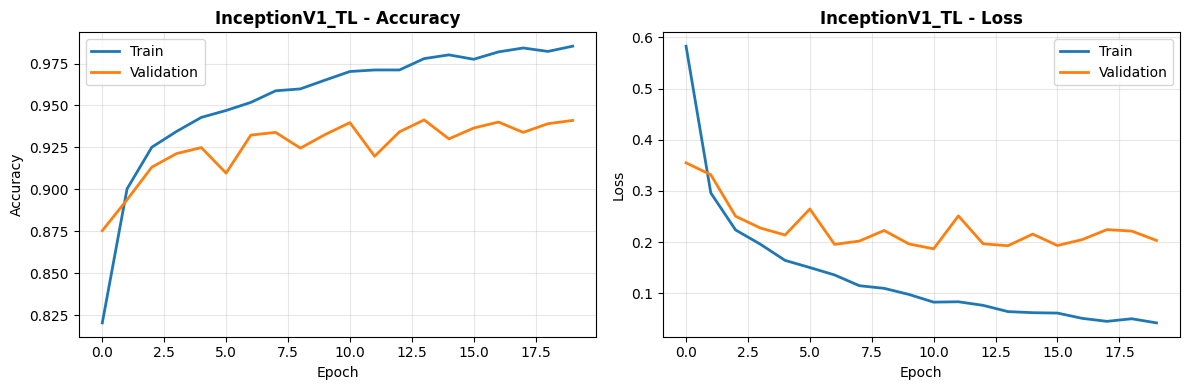

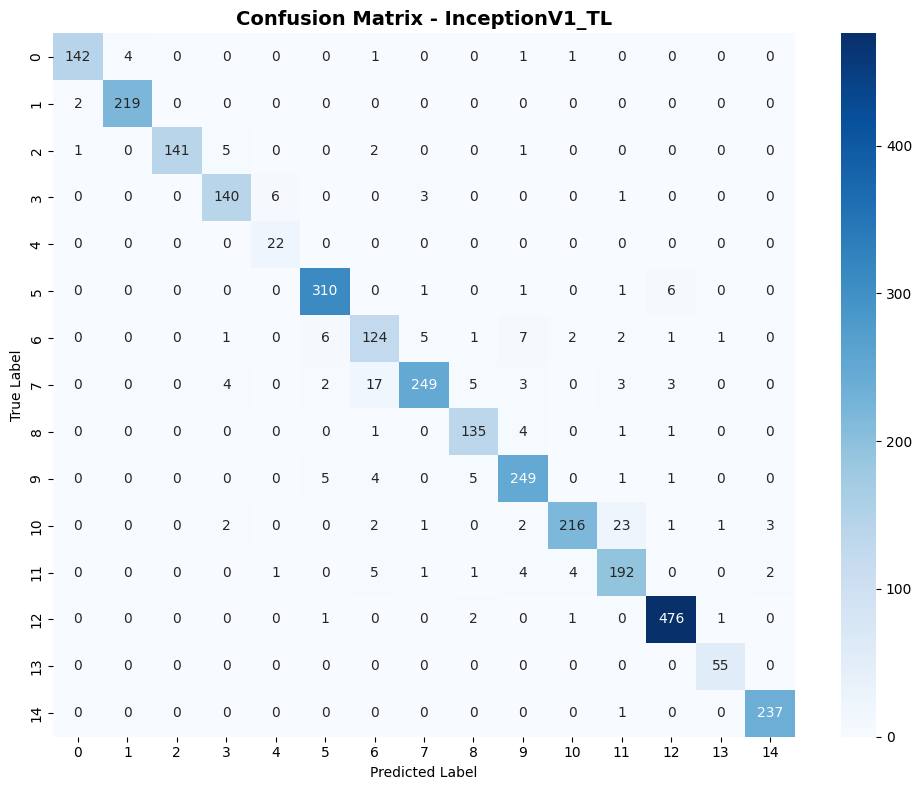


Plotting ROC Curve for InceptionV1_TL...


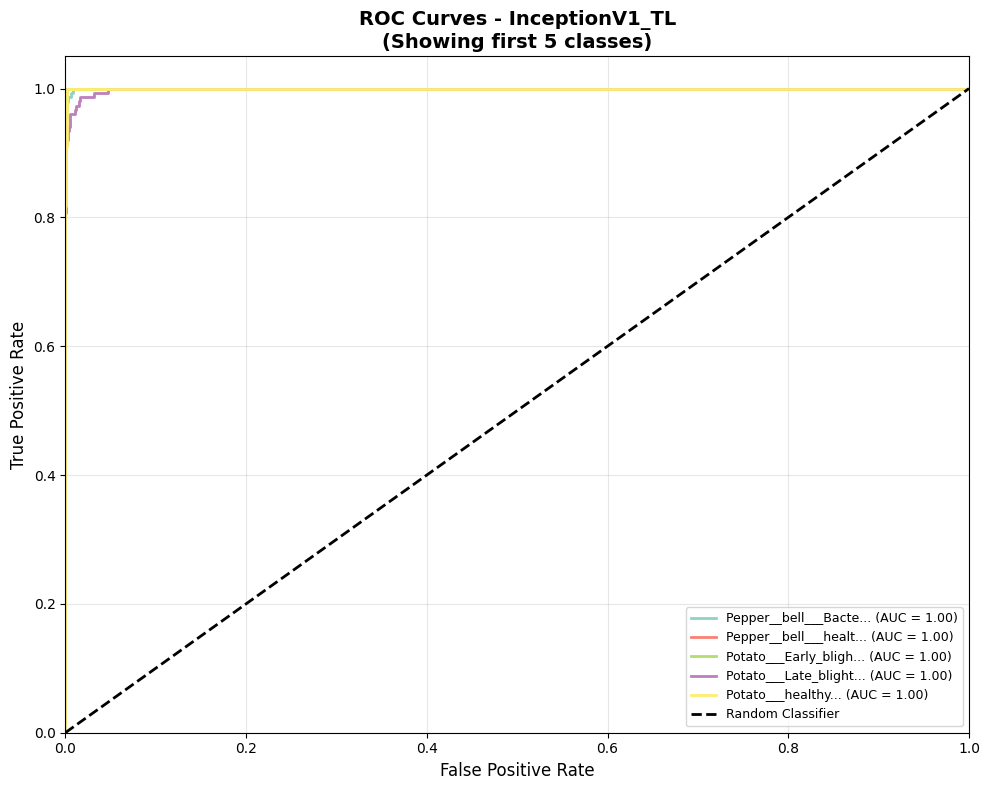

 ROC Curve plotted!
   Overall ROC-AUC: 0.9985


In [35]:
metrics = calculate_metrics(model, test_gen, class_names, 'InceptionV1_TL')
plot_training_history(history, 'InceptionV1_TL')
plot_confusion_matrix(metrics['confusion_matrix'], class_names, 'InceptionV1_TL')
plot_roc_curve(metrics, class_names, 'InceptionV1_TL')
